<a href="https://colab.research.google.com/github/Kunj0201/Potential-Loan-defaults-Prediction/blob/main/Potential_Loan_Defaults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive._mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import warnings

#For Plotting
import matplotlib.pyplot as plt 
import seaborn as sns

#Other Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Models to be used

from sklearn.tree import DecisionTreeClassifier


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df = pd.read_csv('/DATA_600.csv')
df = pd.read_csv('/content/drive/MyDrive/DMT project (Loan-Defaults-Prediction)/DATASET/DATA_600.csv')
data = pd.read_csv('/content/drive/MyDrive/DMT project (Loan-Defaults-Prediction)/DATASET/DATA_600.csv')
#df = pd.read_csv('/content/DATA_600.csv')
#/content/drive/my-drive/DMT project (Loan-Defaults-Prediction)/DATASET/DATA_600.csv

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
print(f" Dataset (rows,columns): {df.shape}")

 Dataset (rows,columns): (614, 13)




---




---









# **Now moving onto Data-Preprocessing** ⏬⏬




In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Continous variables are: CoapplicantIncome, ApplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History. 

Categorical Variables are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_area, Loan_Status.

In [ ]:
#
#
df.drop('Loan_ID',axis=1,inplace=True)
df.head()
#
#
df['Credit_History'] = df['Credit_History'].astype('O')

In [ ]:
df.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,564.0,614,614
unique,2,2,4,2,2,2.0,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,489,398,345,480,500,475.0,233,422


--> We removed the Loan ID column because it was irrelevant to our analysis.

--> We changed the data type of Credit_History to because its just zeros and ones.

<br>





In [ ]:
#Looking for duplicate rows
df.duplicated().any()

False

The percentage of Y class : 68.73
The percentage of N class : 31.27


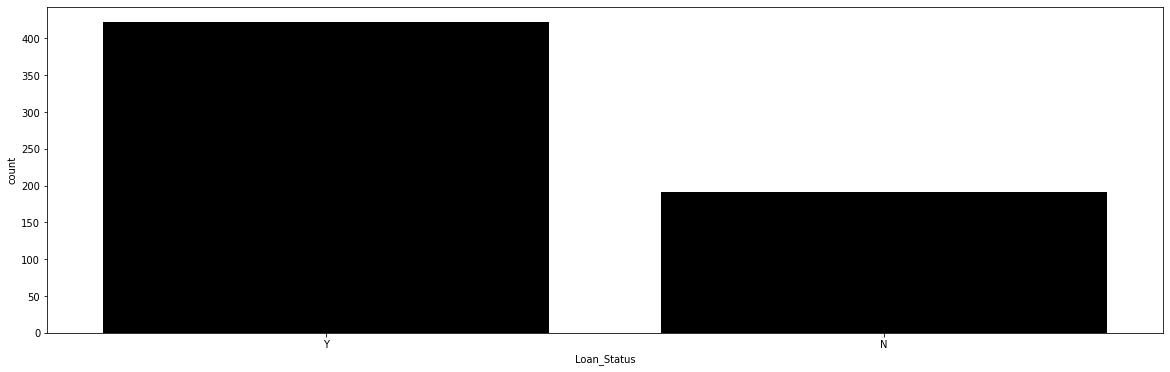

In [ ]:
#Looking at the target class

plt.figure(figsize=(20,6))
sns.countplot(df['Loan_Status'], color="black");

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0]*100 / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1]*100 / len(df)))

#Very imbalanced data 

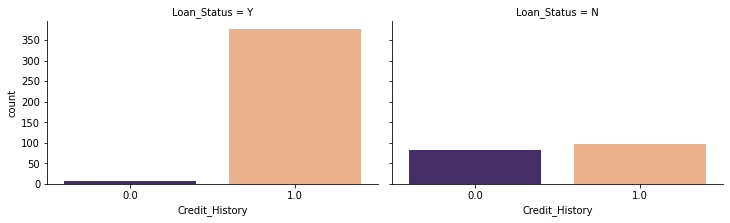

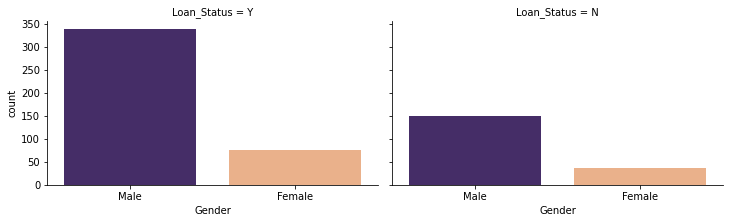

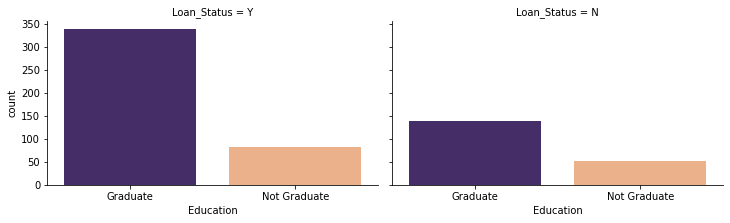

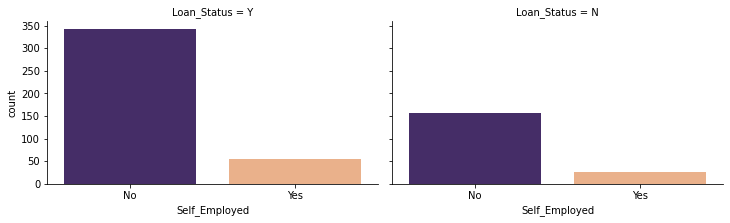

In [ ]:
#Plotting Graphs for all the categorical data to understand them

#Credit_History
grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History',palette=['#432371',"#FAAE7B"]);

#Gender
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender',palette=['#432371',"#FAAE7B"]);

#Education
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education',palette=['#432371',"#FAAE7B"]);

#Self_Employed
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed',palette=['#432371',"#FAAE7B"]);



# Interpretation of the Graphs above:     


1. We can observe that if you have Credit History = 1 , you will have better chance to get a loan. ⭐⭐
2. Most males and females got loans so this is not really a great differentiaing feature.⭐
3. If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
4. We observe that there is no pattern.





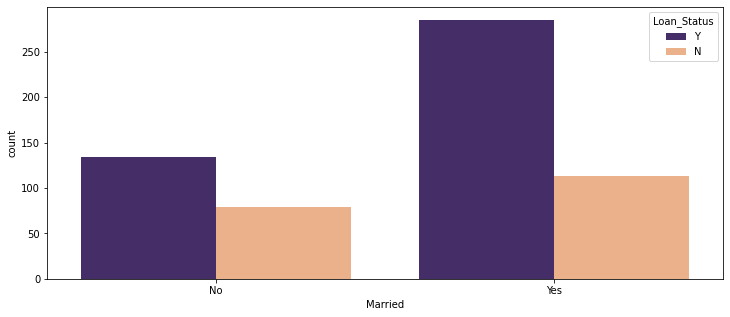

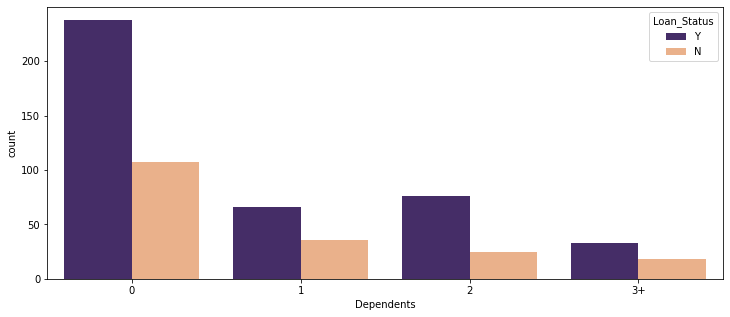

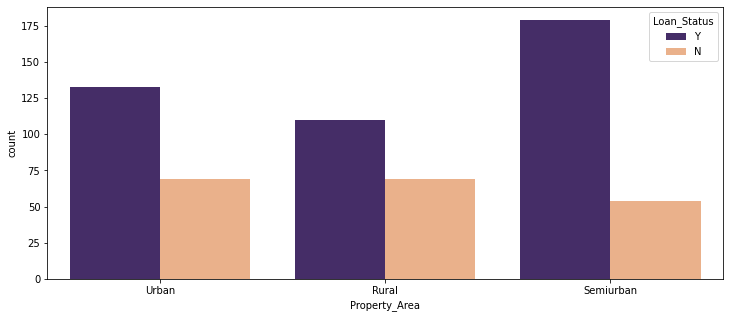

In [ ]:
#Married
plt.figure(figsize=(12.11,5))
sns.countplot(x='Married', hue='Loan_Status', data=df,palette=['#432371',"#FAAE7B"]);

# Dependents
plt.figure(figsize=(12.11,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df,palette=['#432371',"#FAAE7B"]);

# Property_Area
plt.figure(figsize=(12.11,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df,palette=['#432371',"#FAAE7B"]);

# Interpretation of the Graphs above:    


1. Most people who get married did get a loan, so married people have a higher chance of receiving a loan. ⭐
2. We observe that if there are no dependants then the chances of receiving a loan is very high. ⭐
3. We observe that semi-urban property area has a very high chance of receiving a loan. ⭐



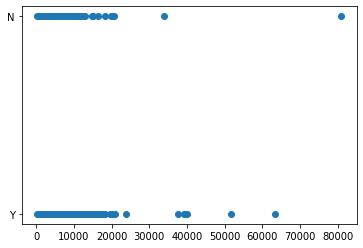

In [ ]:
#Income
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

#No pattern

In [ ]:
#Understanding numerical or continous data

df.groupby('Loan_Status').median(), df.groupby('Loan_Status').mean()

(             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
 Loan_Status                                                                  
 N                     3833.5              268.0       129.0             360.0
 Y                     3812.5             1239.5       126.0             360.0,
              ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
 Loan_Status                                                                  
 N                5446.078125        1877.807292  151.220994        344.064516
 Y                5384.068720        1504.516398  144.294404        341.072464)

--> We can observe that for a very low Coapplicant income 268.0 loan was denied, so its a good feature.

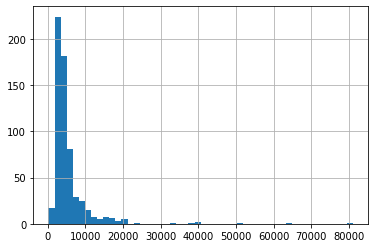

In [ ]:
#Histogram to group data into bins
df['ApplicantIncome'].hist(bins=50)

--> Through the histogram, we can come to a conclusion that there are negligible extreme values

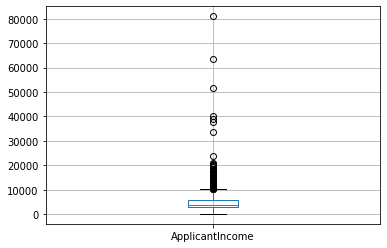

In [ ]:
#Boxplot to understand the distributions
df.boxplot(column='ApplicantIncome')

--> We can observe a lot of outliers in the boxplot, which shows the unequal wealth distribution. One reason could be the difference in education levels. Now let us see how the boxplot looks with respect to education

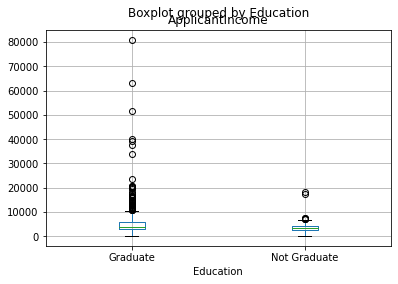

In [ ]:
df.boxplot(column='ApplicantIncome', by='Education')

--> We observe some outliers again. There is neglible difference in the incomes of graduates and non-graduates but there are few graduates who have very high incomes, which is the reason for the presence of outliers

# Handling missing values ⛳⛳

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Therefore, we have the following number of missing values in each column(Gender, Married,...)


Now we will have to separate the categorical and numerical features so we can calculate and fill the missing values respectively.

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

categorical_data.isnull().sum().any()

True

In [ ]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [ ]:
#For categorical data
# filling every column with its own most frequent value you can use

categorical_data = categorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
categorical_data.isnull().sum().any() # no more missing data 


False

In [ ]:
numeric_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [ ]:
# For continous data
# filling every missing value with their previous value in the same column

numeric_data.fillna(numeric_data.mean(), inplace=True)
numeric_data.isnull().sum().any() # no more missing data 

False

# Data transformation 💭💭

In [ ]:
le = LabelEncoder()
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
#transforming the target column

target_values = {'Y': 1 , 'N' : 0}

target = categorical_data['Loan_Status']
categorical_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [ ]:
#transforming other columns

for i in categorical_data:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [ ]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [ ]:
#Combining these two dataframes and the target field

df = pd.concat([categorical_data, numeric_data, target], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849,0.0,146.412162,360.0,1
1,1,1,1,0,0,1,0,4583,1508.0,128.000000,360.0,0
2,1,1,0,0,1,1,2,3000,0.0,66.000000,360.0,1
3,1,1,0,1,0,1,2,2583,2358.0,120.000000,360.0,1
4,1,0,0,0,0,1,2,6000,0.0,141.000000,360.0,1




---



---

# TRAINING-TESTING AND MODELLING ⚡⚡

In [ ]:
# Specify input and output attributes
X = pd.concat([categorical_data, numeric_data], axis=1)
y = target 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.21, random_state=10)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (485, 11)
y_train shape (485,)
X_test shape (129, 11)
y_test shape (129,)

ratio of target in y_train : [0.68659794 0.31340206]
ratio of target in y_test : [0.68992248 0.31007752]
ratio of target in original_data : [0.68729642 0.31270358]


# Decision Tree, Naive-Bayes, K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
models = {
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth = 2, random_state = 10),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NaiveBayesClassifier': GaussianNB()
}

In [ ]:
# Building the Functions

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.4f\n  rec: %.4f\n  f1: %.4f\n  loss: %.4f\n  acc: %.4f' % (pre, rec, f1, loss, acc))

In [ ]:
# Evaluating the model

def train_eval(models, X, y):
    for name, model in models.items():
        print(name, ':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('#'*40)

In [ ]:
train_eval(models, X_train, y_train)

DecisionTreeClassifier :
  pre: 0.7981
  rec: 0.9850
  f1: 0.8817
  loss: 6.2670
  acc: 0.8186
########################################
KNeighborsClassifier :
  pre: 0.7488
  rec: 0.9129
  f1: 0.8227
  loss: 9.3292
  acc: 0.7299
########################################
NaiveBayesClassifier :
  pre: 0.7975
  rec: 0.9700
  f1: 0.8753
  loss: 6.5518
  acc: 0.8103
########################################


In [ ]:
# train_eval_cross
# in the next cell i will be explaining this function

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

DecisionTreeClassifier :
 pre     0.787867
 rec     0.970024
 f1      0.869399
 loss    6.907488
 acc     0.800012
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.683745
 rec      0.804812
 f1       0.739346
 loss    13.458968
 acc      0.610329
Name: 0, dtype: float64
------------------------------
NaiveBayesClassifier :
 pre     0.794791
 rec     0.931048
 f1      0.857218
 loss    7.333587
 acc     0.787675
Name: 0, dtype: float64
------------------------------


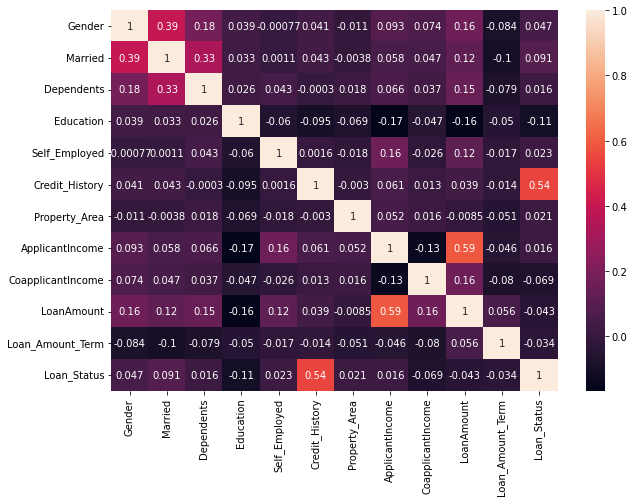

In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [ ]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
269,0,0,1,0,0,1,2,2876,1560.0,90.000000,360.0
116,0,1,0,0,0,1,1,3167,2283.0,154.000000,360.0
95,1,0,0,0,0,1,2,6782,0.0,146.412162,360.0
233,0,0,0,0,0,1,1,8333,0.0,280.000000,360.0
133,1,1,0,0,1,1,1,3459,0.0,25.000000,120.0


In [ ]:
# I will try to make some operations on some features, here I just tried diffrent operations on diffrent features,
# having experience in the field, and having knowledge about the data will also help

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

In [ ]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,new_col,new_col_2
269,0,0,1,0,0,1,2,2876,1560.0,90.000000,360.0,0.542420,32400.000000
116,0,1,0,0,0,1,1,3167,2283.0,154.000000,360.0,0.720871,55440.000000
95,1,0,0,0,0,1,2,6782,0.0,146.412162,360.0,0.000000,52708.378378
233,0,0,0,0,0,1,1,8333,0.0,280.000000,360.0,0.000000,100800.000000
133,1,1,0,0,1,1,1,3459,0.0,25.000000,120.0,0.000000,3000.000000


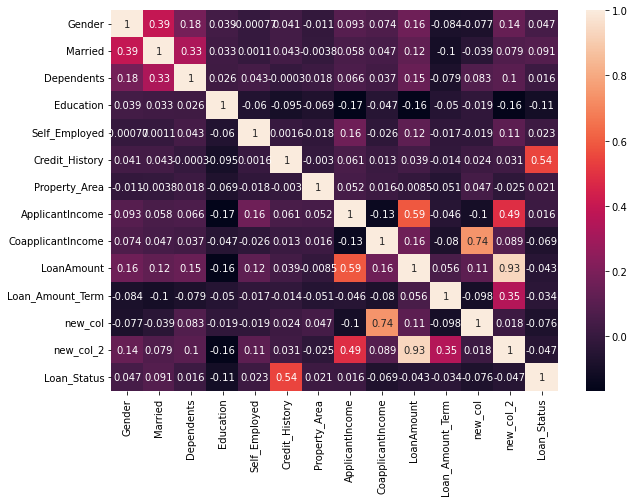

In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [ ]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [ ]:
train_eval_cross(models, X_train, y_train, skf)

DecisionTreeClassifier :
 pre     0.789869
 rec     0.949048
 f1      0.862005
 loss    7.191165
 acc     0.791798
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.684752
 rec      0.780752
 f1       0.729400
 loss    13.743525
 acc      0.602090
Name: 0, dtype: float64
------------------------------
NaiveBayesClassifier :
 pre      0.689070
 rec      0.984976
 f1       0.810870
 loss    10.896175
 acc      0.684530
Name: 0, dtype: float64
------------------------------


In [ ]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    393
0     92
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    170
Name: Married, dtype: int64
------------------------------------------------
0    292
2     82
1     72
3     39
Name: Dependents, dtype: int64
------------------------------------------------
0    385
1    100
Name: Education, dtype: int64
------------------------------------------------
0    422
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    415
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    185
2    159
0    141
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000    214
0.735294      2
0.565659      2
0.527858      1
0.971978      1
           ... 
0.231996      1
0.824568      1
3.129577      1
0.575006      1
0.542420      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
52708.378378    15


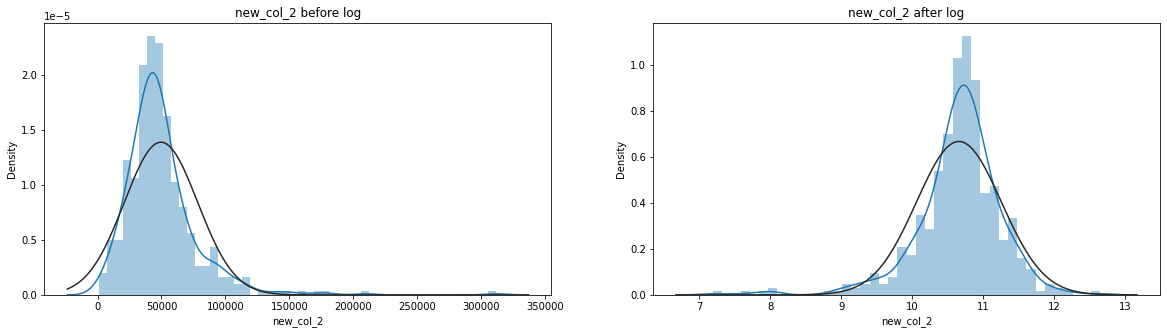

In [ ]:
from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [ ]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, X_train, y_train, skf)

# wooow our models improved really good by just doing the previous step .

DecisionTreeClassifier :
 pre     0.791891
 rec     0.949048
 f1      0.863176
 loss    7.120096
 acc     0.793856
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.746934
 rec     0.930849
 f1      0.828811
 loss    9.118243
 acc     0.736005
Name: 0, dtype: float64
------------------------------
NaiveBayesClassifier :
 pre     0.795567
 rec     0.969970
 f1      0.874152
 loss    6.623211
 acc     0.808242
Name: 0, dtype: float64
------------------------------


In [ ]:
# new_col

# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    214
0.735294      2
0.565659      2
0.527858      1
0.971978      1
           ... 
0.231996      1
0.824568      1
3.129577      1
0.575006      1
0.542420      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    271
0.0    214
Name: new_col, dtype: int64


In [ ]:
train_eval_cross(models, X_train, y_train, skf)

# ok we are improving our models as we go 

DecisionTreeClassifier :
 pre     0.788462
 rec     0.984994
 f1      0.875836
 loss    6.622926
 acc     0.808251
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.750422
 rec     0.930849
 f1      0.830937
 loss    8.975224
 acc     0.740146
Name: 0, dtype: float64
------------------------------
NaiveBayesClassifier :
 pre     0.790366
 rec     0.984994
 f1      0.877005
 loss    6.551857
 acc     0.810308
Name: 0, dtype: float64
------------------------------


In [ ]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')
    
# looks better

1    393
0     92
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    170
Name: Married, dtype: int64
------------------------------------------------
0    292
2     82
1     72
3     39
Name: Dependents, dtype: int64
------------------------------------------------
0    385
1    100
Name: Education, dtype: int64
------------------------------------------------
0    422
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    415
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    185
2    159
0    141
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    271
0.0    214
Name: new_col, dtype: int64
------------------------------------------------
10.872530    15
10.673596    14
10.586584    11
10.738134     9
10.961278     9
             ..
11.576463     1
9.469623      1
11.141862     1
11.638677     1
10.511077     1
Name: new_

## OUTLIERS

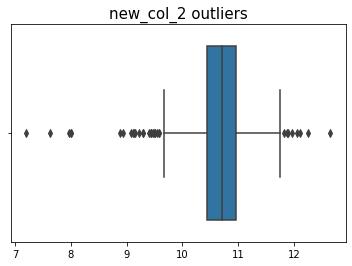

In [ ]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [ ]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.439980923050696 , Quartile 75: 10.961277846683982
iqr: 0.5212969236332867
Cut Off: 0.7819453854499301
Lower: 9.658035537600766
Upper: 11.743223232133913
Nubers of Outliers: 32
outliers:[8.006367567650246, 11.96374627479919, 11.877568578558138, 9.137769679141348, 7.965545573129992, 9.587406005562649, 7.620705086838262, 9.469622969906265, 9.21830854162536, 9.144200569471638, 9.287301413112312, 8.881836305004146, 9.084777149000837, 9.441452092939569, 8.006367567650246, 9.549665677579801, 8.930626469173578, 12.100712129872347, 9.51044496442652, 9.441452092939569, 9.441452092939569, 9.287301413112312, 9.112948025967533, 9.483416292038601, 7.194436851100335, 12.059890135352092, 12.65075846679162, 11.889991098556695, 9.578311275656766, 11.81569317484005, 9.400630098419315, 12.254862809699606]

len X_train before dropping the outliers 485
len X_train before dropping the outliers 453


In [ ]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

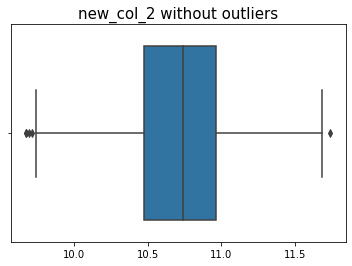

In [ ]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

In [ ]:
train_eval_cross(models, X_train, y_train, skf)

DecisionTreeClassifier :
 pre     0.792206
 rec     0.983871
 f1      0.877696
 loss    6.480790
 acc     0.812366
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.741423
 rec     0.906452
 f1      0.815672
 loss    9.683108
 acc     0.719650
Name: 0, dtype: float64
------------------------------
NaiveBayesClassifier :
 pre     0.792206
 rec     0.983871
 f1      0.877696
 loss    6.480790
 acc     0.812366
Name: 0, dtype: float64
------------------------------


# Feature Selection

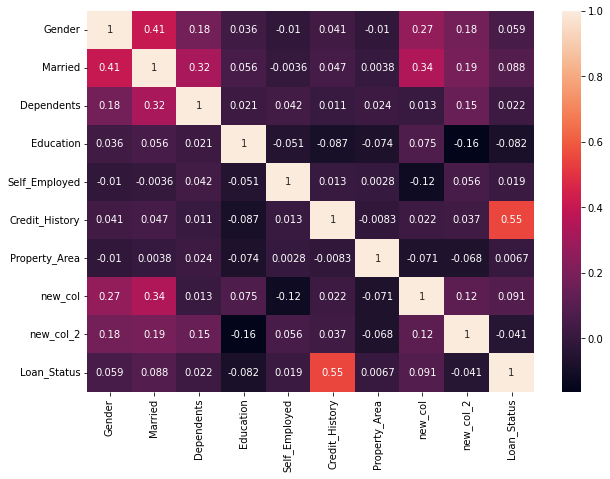

In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [ ]:
X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

# looks like Self_Employed is not important
# KNeighborsClassifier improved

# droping all the features Except for Credit_History actually improved KNeighborsClassifier and didn't change anything in other models

#X_train.drop(['Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

DecisionTreeClassifier :
 pre     0.792206
 rec     0.983871
 f1      0.877696
 loss    6.480790
 acc     0.812366
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.743373
 rec     0.916129
 f1      0.820736
 loss    9.453195
 acc     0.726307
Name: 0, dtype: float64
------------------------------
NaiveBayesClassifier :
 pre     0.792206
 rec     0.983871
 f1      0.877696
 loss    6.480790
 acc     0.812366
Name: 0, dtype: float64
------------------------------


## Evaluating test model

In [ ]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
596,1,1,2,1,1,1,0,6383,1000.0,187.0,360.0
506,1,1,0,0,0,1,2,20833,6667.0,480.0,360.0
126,1,1,3,0,0,1,0,23803,0.0,370.0,360.0
386,1,0,0,1,0,1,1,2346,1600.0,132.0,360.0
67,1,1,1,0,0,1,2,10750,0.0,312.0,360.0


In [ ]:
X_test_new = X_test.copy()

In [ ]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

X_test_new.drop(['Self_Employed'], axis=1, inplace=True)

# drop all the features Except for Credit_History
#X_test_new.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

In [ ]:
X_test_new.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
596,1,1,2,1,1,0,1.0,11.117213
506,1,1,0,0,1,2,1.0,12.059890
126,1,1,3,0,1,0,0.0,11.799607
386,1,0,0,1,1,1,1.0,10.768906
67,1,1,1,0,1,2,0.0,11.629107


In [ ]:
X_train.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
269,0,0,1,0,1,2,1.0,10.385914
116,0,1,0,0,1,1,1.0,10.923057
95,1,0,0,0,1,2,0.0,10.872530
233,0,0,0,0,1,1,0.0,11.520894
211,1,1,3,0,0,1,1.0,10.738134


In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

DecisionTreeClassifier:
  pre: 0.7838
  rec: 0.9775
  f1: 0.8700
  loss: 6.9615
  acc: 0.7984
----------------------------------------
KNeighborsClassifier:
  pre: 0.7706
  rec: 0.9438
  f1: 0.8485
  loss: 8.0324
  acc: 0.7674
----------------------------------------
NaiveBayesClassifier:
  pre: 0.8056
  rec: 0.9775
  f1: 0.8832
  loss: 6.1582
  acc: 0.8217
----------------------------------------
